# OVO Tutorial #1: Multi-Scale Image Analysis and Edge Detection

In this tutorial, we'll explore:

1. Basic image operations and homography estimation
2. Multi-scale image analysis using image pyramids
3. Edge detection using the Canny algorithm

## Setup and Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Configure matplotlib for notebook display
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

# Part 1: Image Basics and Homography

## Exercise 1.1: Loading and Basic Image Properties

Explore the images basic properties:

- Display the image shape
- Print the data type
- Show the value range (min and max)
- Display the image using matplotlib


In [2]:
# We load the grayscale image using imread and specifying that it's a grayscale image in the second argument
FILEPATH = "../data/"
gray = cv2.imread(FILEPATH + 'graycat.jpg', cv2.IMREAD_GRAYSCALE)

Image shape: (533, 800)
Image data type: <class 'numpy.ndarray'>
Image range: (0, 255)


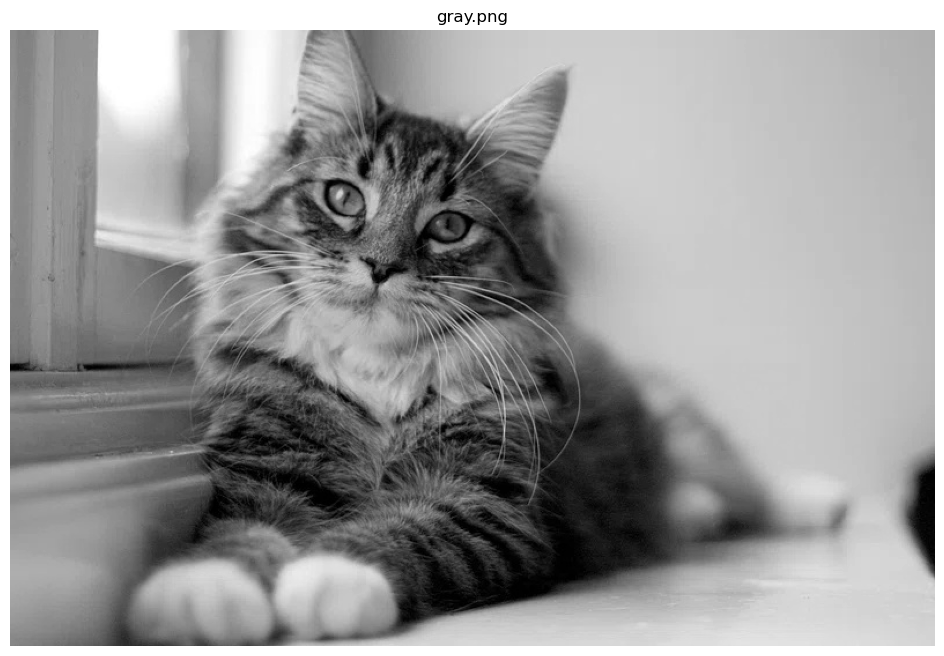

In [3]:
print("Image shape:", gray.shape) # Image is 533 pixels high by 800 pixels wide
print("Image data type:", type(gray)) # Image is encoded as a numpy array
print("Image range:", f"({gray.min()}, {gray.max()})") # Image range is (0, 255), meaning there are totally white and totally black pixels

##Display loaded image

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("gray.png")
plt.show()

## Exercise 1.2: Point Transformations

Implement two functions:

1. `adjust_brightness(image, beta)`: Adjusts image brightness by adding beta
2. `adjust_contrast(image, alpha)`: Adjusts image contrast by multiplying by alpha

Remember to:

- Convert to float for calculations
- Convert back to uint8


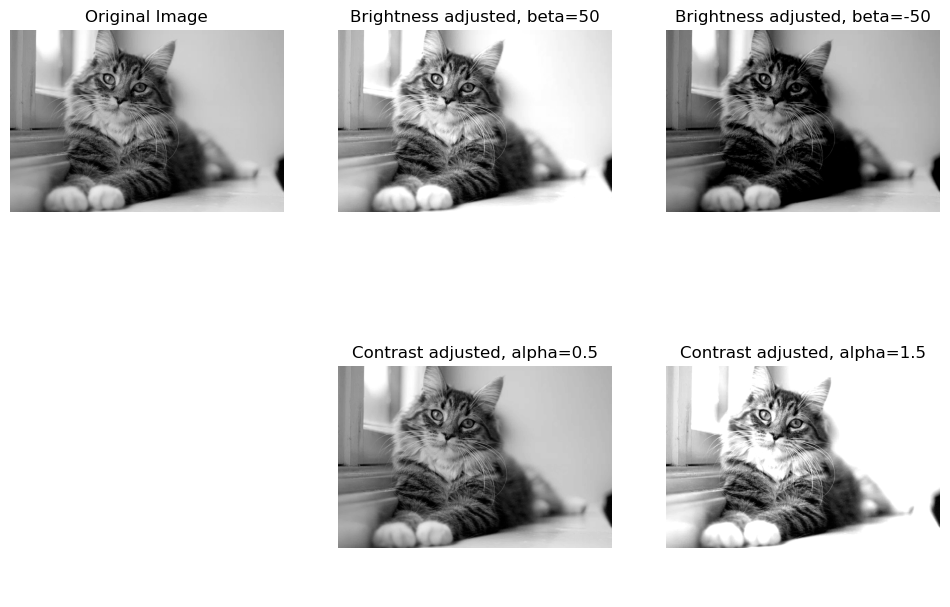

In [4]:
def adjust_brightness(image, beta):
    """Adjust brightness by adding a constant

    Args:
        image: uint8 image array
        beta: brightness adjustment (-255 to 255)
    """
    # Your code here
    adjusted_image = image.astype(np.float32) + beta
    adjusted_image = adjusted_image.clip(0, 255)
    return adjusted_image.astype(np.uint8)

def adjust_contrast(image, alpha):
    """Adjust contrast by multiplication

    Args:
        image: uint8 image array
        alpha: contrast adjustment (0 to 3)
    """
    # Your code here
    adjusted_image = alpha * image.astype(np.float32)
    adjusted_image = adjusted_image.clip(0, 255)
    return adjusted_image.astype(np.uint8)

# Test your implementation: beta in {50, -50} and alpha in {0.5, 1.5}
brightness_adjusted_image_50 = adjust_brightness(gray, 50)
brightness_adjusted_image_minus_50 = adjust_brightness(gray, -50)

contrast_adjusted_image_05 = adjust_contrast(gray, .5)
contrast_adjusted_image_15 = adjust_contrast(gray, 1.5)

_, ax = plt.subplots(2, 3)


ax[0,0].imshow(gray, cmap='gray')
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')

ax[0,1].imshow(brightness_adjusted_image_50, cmap='gray')
ax[0,1].set_title("Brightness adjusted, beta=50")
ax[0,1].axis('off')

ax[0,2].imshow(brightness_adjusted_image_minus_50, cmap='gray')
ax[0,2].set_title("Brightness adjusted, beta=-50")
ax[0,2].axis('off')

ax[1,1].imshow(contrast_adjusted_image_05, cmap='gray')
ax[1,1].set_title("Contrast adjusted, alpha=0.5")
ax[1,1].axis('off')

ax[1,2].imshow(contrast_adjusted_image_15, cmap='gray')
ax[1,2].set_title("Contrast adjusted, alpha=1.5")
ax[1,2].axis('off')

ax[1,0].axis('off')

plt.show()

## Exercise 1.3: Working with Image Patches

Implement the `extract_patch` function that extracts a rectangular region from an image:

- Take center coordinates and patch size as input
- Return the extracted patch


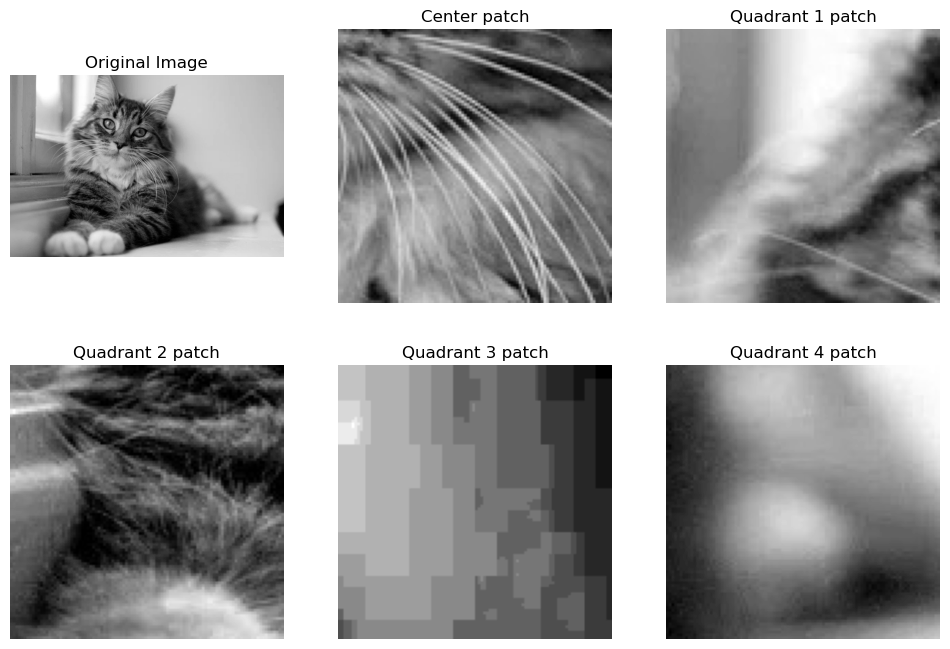

In [5]:
def extract_patch(image, center, size):
    """Extract a patch from the image

    Args:
        image: Input image
        center: (x, y) coordinates of patch center
        size: (width, height) of patch
    """
    # Your code here
    return image[center[0] - (size[0] //2):center[0] + (size[0] //2), center[1] - (size[1] //2):center[1] + (size[1] //2)]

# Test your implementation with 100x100 patches centered at: the center of the image, the center of each quadrant (5 patches total)
size = (100, 100)

image_center = (gray.shape[0] // 2, gray.shape[1] // 2)
quadrant_center_1 = (gray.shape[0] // 4, gray.shape[1] // 4)
quadrant_center_2 = (3 *gray.shape[0] // 4, gray.shape[1] // 4)
quadrant_center_3 = (gray.shape[0] // 4, 3 * gray.shape[1] // 4)
quadrant_center_4 = (3 * gray.shape[0] // 4, 3 * gray.shape[1] // 4)


_, ax = plt.subplots(2, 3)


ax[0,0].imshow(gray, cmap='gray')
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')

ax[0,1].imshow(extract_patch(gray, image_center, size), cmap='gray')
ax[0,1].set_title("Center patch")
ax[0,1].axis('off')

ax[0,2].imshow(extract_patch(gray, quadrant_center_1, size), cmap='gray')
ax[0,2].set_title("Quadrant 1 patch")
ax[0,2].axis('off')

ax[1,0].imshow(extract_patch(gray, quadrant_center_2, size), cmap='gray')
ax[1,0].set_title("Quadrant 2 patch")
ax[1,0].axis('off')

ax[1,1].imshow(extract_patch(gray, quadrant_center_3, size), cmap='gray')
ax[1,1].set_title("Quadrant 3 patch")
ax[1,1].axis('off')

ax[1,2].imshow(extract_patch(gray, quadrant_center_4, size), cmap='gray')
ax[1,2].set_title("Quadrant 4 patch")
ax[1,2].axis('off')

plt.show()

## Exercise 1.4: Frequency Analysis

For each extracted patch:

1. Compute the 2D FFT
2. Visualize the log magnitude spectrum
3. Compare with the spectrum of patches drawn from the `stripe.png` image

Questions to consider:

- How does the frequency content differ between smooth and detailed regions?
- What patterns (or lack thereof) do you see in the magnitude spectra?


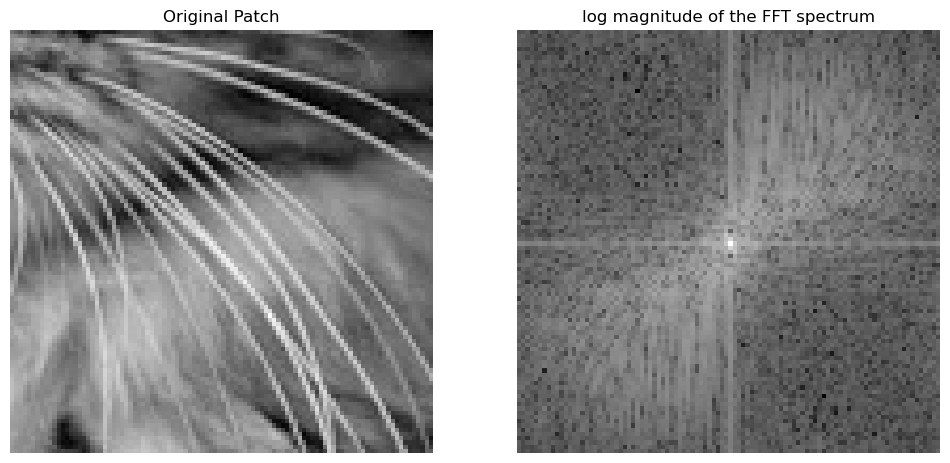

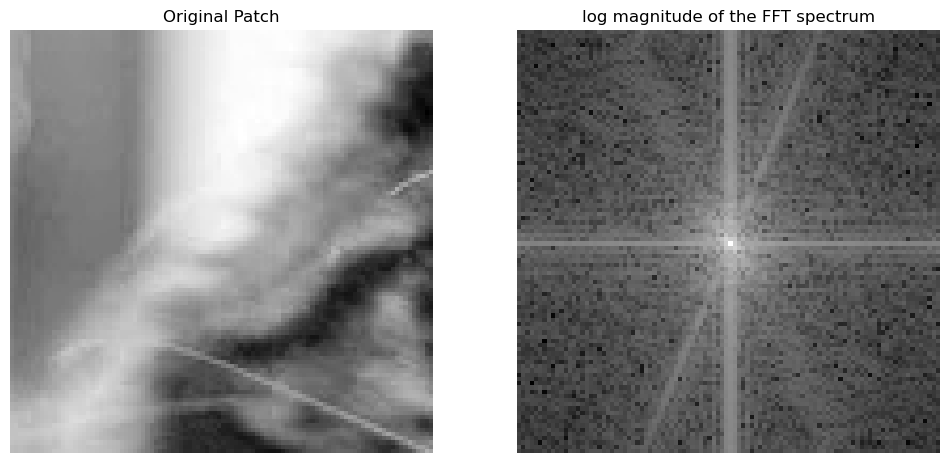

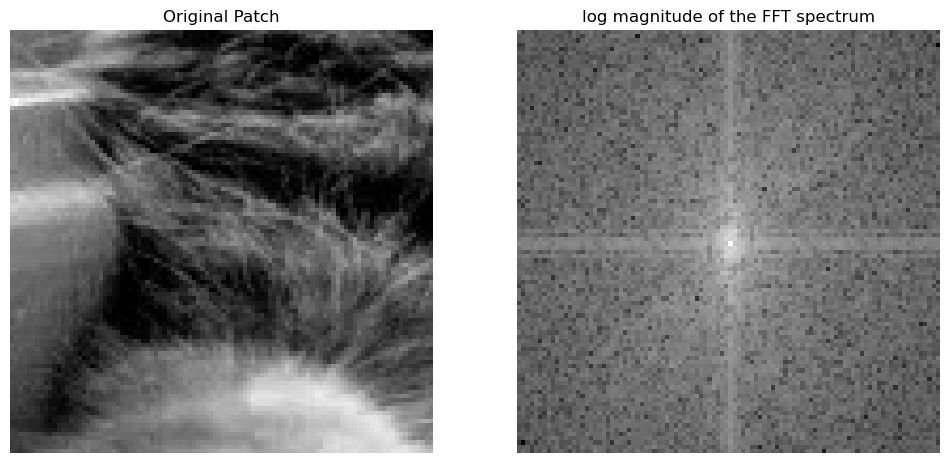

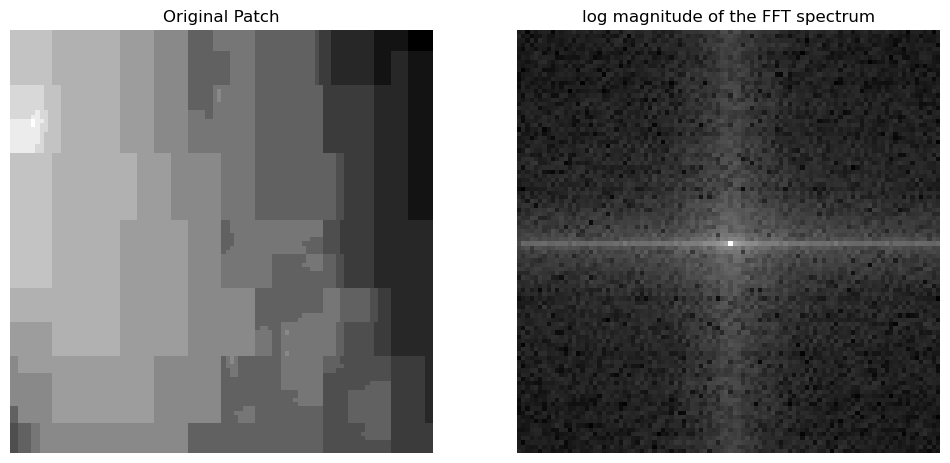

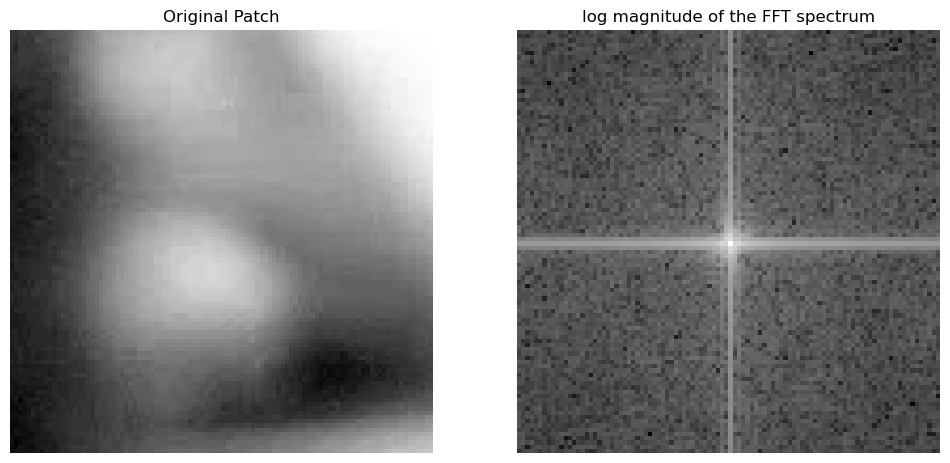

In [6]:
for patch in [extract_patch(gray, center, size) for center in [image_center, quadrant_center_1, quadrant_center_2, quadrant_center_3, quadrant_center_4]]:
    fftMagnitude = np.log1p(abs(np.fft.fftshift(np.fft.fft2(patch))))

    fig, (ax1, ax2) = plt.subplots(1, 2)

    ax1.imshow(patch, cmap='gray')
    ax1.set_title("Original Patch")
    ax1.axis('off')
    
    ax2.imshow(fftMagnitude, cmap='gray')
    ax2.set_title("log magnitude of the FFT spectrum")
    ax2.axis('off')

#When the patch is more detailled, the fft magnitude spectrum will look noisier, with lots of positive values.
#When the patch is smoother, the fft magnitude will only present a single peak at a given frequency, thus appearing less noisy, more uniform (blac in our case, since 0 frequency correspond to a black spot)
#However, in every fft, we can see a "cross", corrsponding to 0 frequency values both in horizontal and vertical frequencies

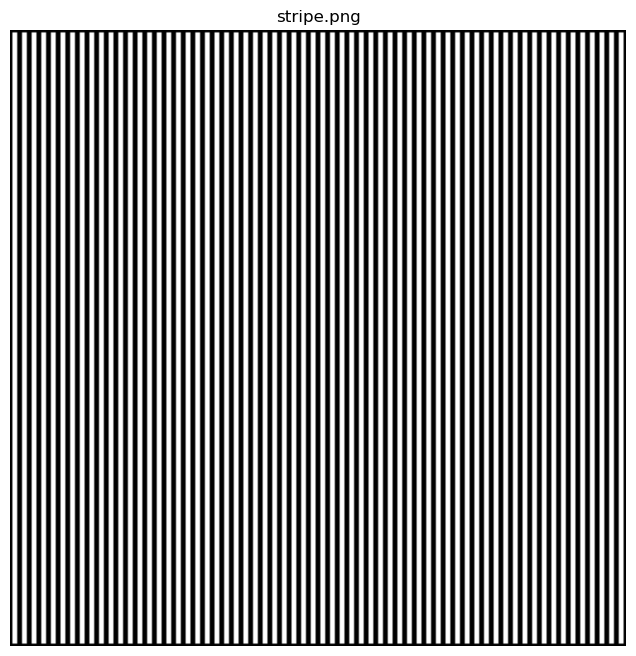

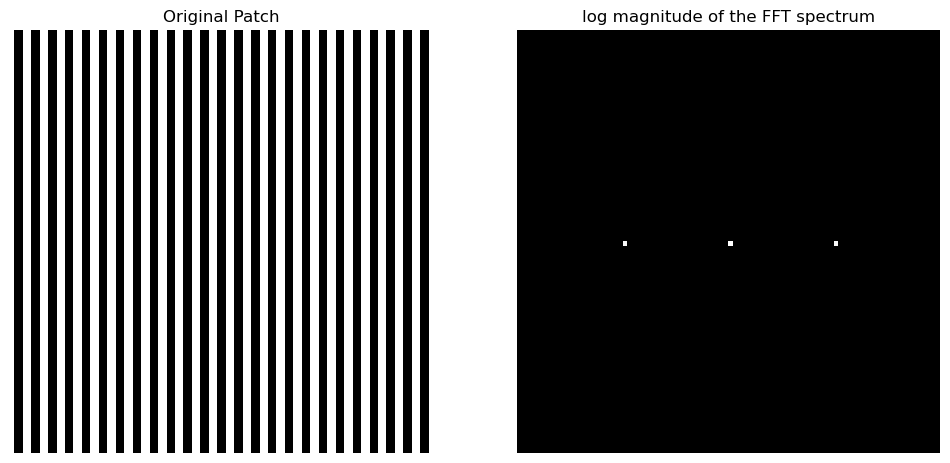

In [7]:
stripe = cv2.imread(FILEPATH + 'stripe.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(stripe, cmap='gray')
plt.axis('off')
plt.title("stripe.png")
plt.show()
# Since stripe image is periodic, all patches will lokk the same. We'll focus on the center patch


stripe_image_center = (stripe.shape[0] // 2, stripe.shape[1] // 2)


patch = extract_patch(stripe, stripe_image_center, size)
fftMagnitude = np.log1p(abs(np.fft.fftshift(np.fft.fft2(patch))))

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(patch, cmap='gray')
ax1.set_title("Original Patch")
ax1.axis('off')

ax2.imshow(fftMagnitude, cmap='gray')
ax2.set_title("log magnitude of the FFT spectrum")
ax2.axis('off')

plt.show()

#Since the stripe pattern is periodic, we can explicitly calculate its 2D fft. ;
#Moreover, since the stripes are vertical, we'll expect to see a dot along the x-axis of the fft magnitude, at a position given by the frequency in the image
#Since 2D fft is symetric, we'll see the same dot on the left of the center

## Exercise 1.5: Homography Estimation

In this exercise we will estimate the homography matrix given a set of correspondences between two images.


In [8]:
def estimate_homography_dlt(pts1, pts2):
    """Estimate homography matrix using DLT

    Args:
        pts1, pts2: 4x2 arrays of corresponding points
    Returns:
        H: 3x3 homography matrix mapping pts1 to pts2
    """
    # Your code here

    # Construct the equations matrix A
    A = []
    for i in range(4):
        x_i, y_i = pts1[i]
        x_prime_i, y_prime_i = pts2[i]

        A.append([x_i, y_i, 1, 0, 0, 0, - x_i * x_prime_i, - y_i * x_prime_i, -x_prime_i])
        A.append([0, 0, 0, x_i, y_i, 1, - x_i * y_prime_i, - y_i * y_prime_i, - y_prime_i])

    A = np.array(A)

    # Solve using SVD
    _, _, Vt = np.linalg.svd(A) # Calculate SVD of A
    H = Vt[-1].reshape(3, 3) # Solution is last column of V, i.e last row of Vt

    # Return normalized homography
    H /= np.linalg.norm(H, 2) #normalize so that norm2(H) = 1  
    
    return H

The following code will visualize your homography for you - you don't have to modify it, just define correctly the previous function


In [9]:
def verify_homography(img1, img2, H, padding_percent=10):
    """Verify homography by displaying a visual comparison of two images and their alignment

    Args:
        img1 (numpy.ndarray): First input image
        img2 (numpy.ndarray): Second input image
        H (numpy.ndarray): 3x3 homography matrix mapping img1 to img2
        padding_percent (int): Amount of padding to add around output image in percent

    Returns:
        numpy.ndarray: Blended result showing alignment of warped img1 with img2
    """

    # Ensure images are grayscale
    if len(img1.shape) == 3:
        img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    if len(img2.shape) == 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    h2, w2 = img2.shape[:2]

    # Calculate padding
    pad_x = int(w2 * padding_percent / 100)
    pad_y = int(h2 * padding_percent / 100)

    # Create output size with padding
    out_w = w2 + 2*pad_x
    out_h = h2 + 2*pad_y

    # Adjust homography for the padding offset
    T = np.array([
        [1, 0, pad_x],
        [0, 1, pad_y],
        [0, 0, 1]
    ])
    H_adj = T @ H

    # Warp and create padded images
    img1_warped = cv2.warpPerspective(img1, H_adj, (out_w, out_h))
    img2_padded = np.zeros((out_h, out_w), dtype=np.uint8)
    img2_padded[pad_y:pad_y+h2, pad_x:pad_x+w2] = img2

    # Visualization
    plt.figure(figsize=(15, 5))

    plt.subplot(131)
    plt.imshow(img1, cmap='gray')
    plt.scatter(pts1[:, 0], pts1[:, 1], c='r', s=100)
    plt.title('Image 1 with points')
    plt.axis('off')

    plt.subplot(132)
    plt.imshow(img2, cmap='gray')
    plt.scatter(pts2[:, 0], pts2[:, 1], c='r', s=100)
    plt.title('Image 2 with points')
    plt.axis('off')

    plt.subplot(133)
    blend = cv2.addWeighted(img1_warped, 0.5, img2_padded, 0.5, 0)
    plt.imshow(blend, cmap='gray')
    plt.title('Blended Result')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    return cv2.addWeighted(img1_warped, 0.5, img2_padded, 0.5, 0)

# Correspondence points are provided
pts1 = np.array([[2023.2, 2350.1], [1408.0, 1536.8],
                 [1770.8, 2176.3], [1754.1, 2074.8]])
pts2 = np.array([[2982.5, 2398.1], [2354.1, 1538.9],
                 [2710.7, 2194.5], [2694.3, 2090.2]])

Load the images `grayforest1.jpg` and `grayforest2.jpg` and compute the homography between them using the given correspondence points


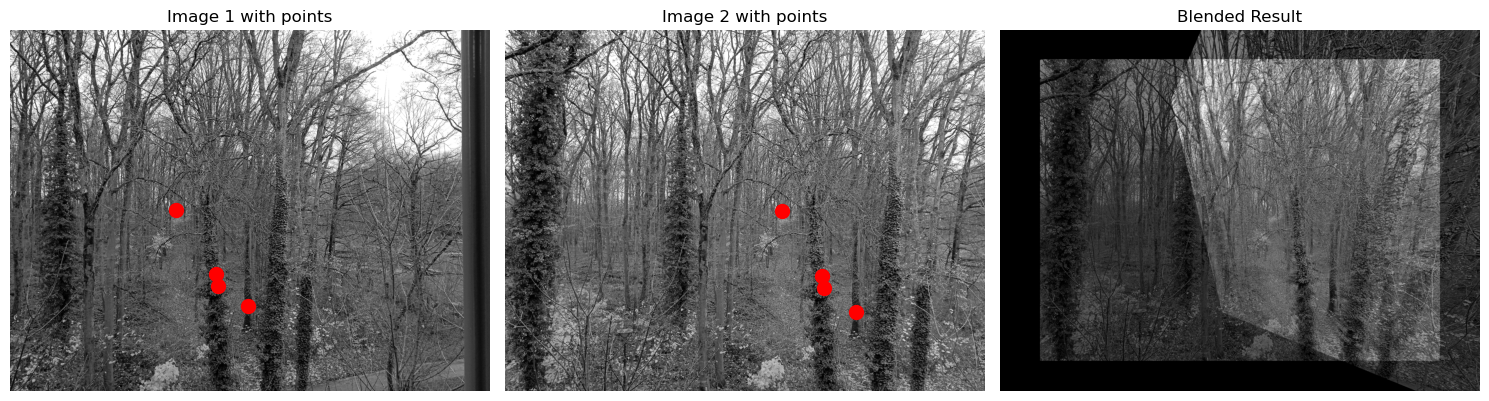

array([[ 0,  0,  0, ..., 36, 36, 38],
       [ 0,  0,  0, ..., 37, 38, 38],
       [ 0,  0,  0, ..., 38, 38, 40],
       ...,
       [ 0,  0,  0, ..., 54, 54, 55],
       [ 0,  0,  0, ..., 46, 46, 47],
       [ 0,  0,  0, ..., 40, 40, 42]], dtype=uint8)

In [10]:
# Load the images
FILEPATH = "../data/"
grayforest1 = cv2.imread(FILEPATH + 'grayforest1.jpg', cv2.IMREAD_GRAYSCALE)
grayforest2 = cv2.imread(FILEPATH + 'grayforest2.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the homography using estimate_homography_dlt on pts1 and pts2
H = estimate_homography_dlt(pts1, pts2)

# Visualize results by calling the verify_homography function
verify_homography(grayforest1, grayforest2, H)

# Part 2: Multi-Scale Image Analysis

## Exercise 2.1: Convolution and Gaussian Kernels

First, implement a basic 2D convolution function:

1. Zero padding
2. Stride = 1 (simple convolution)
3. Test with simple kernels (e.g., blur, edge sharpen, edge)


In [11]:
def zero_pad(image, pad):
    """Add zero padding around the border of an image

    Args:
        image (numpy.ndarray): Input image to pad
        pad (int): Number of pixels of padding to add on all sides

    Returns:
        numpy.ndarray: Zero-padded image with original image in center
    """
    return np.pad(image, pad_width=pad, mode="constant", constant_values=0 )

def conv_2d(image, kernel):
    """Perform 2D convolution of an image with a kernel

    Args:
        image (numpy.ndarray): Input image to convolve
        kernel (numpy.ndarray): 2D convolution kernel

    Returns:
        numpy.ndarray: Result of convolving image with kernel

    Notes:
        Uses zero padding and stride=1
    """
    padded_image = zero_pad(image, kernel.shape[0] // 2) #Zero pad the image with kernel size

    output = np.zeros((padded_image.shape[0] - kernel.shape[0] + 1, padded_image.shape[1] - kernel.shape[1] + 1), dtype=np.float32) # Intialize output image

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            region = padded_image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)
    
    return output

Now work with Gaussian kernels:

We provide a function to create Gaussian kernels.

Convolve one of the previous images with Gaussian kernels with varying size and $\sigma$.


In [12]:
def create_gaussian_kernel(size=5, sigma=1.0):
    """Create a 2D Gaussian kernel for filtering

    Args:
        size (int): Size of the kernel (must be odd)
        sigma (float): Standard deviation of the Gaussian distribution

    Returns:
        numpy.ndarray: Normalized 2D Gaussian kernel of shape (size, size)

    Raises:
        ValueError: If size is not odd
    """
    if size % 2 == 0:
        raise ValueError("Kernel size must be odd")

    x = np.linspace(-(size//2), size//2, size)
    y = x[:, np.newaxis]
    kernel = np.exp(-(x*x + y*y)/(2*sigma*sigma))
    return kernel / kernel.sum()

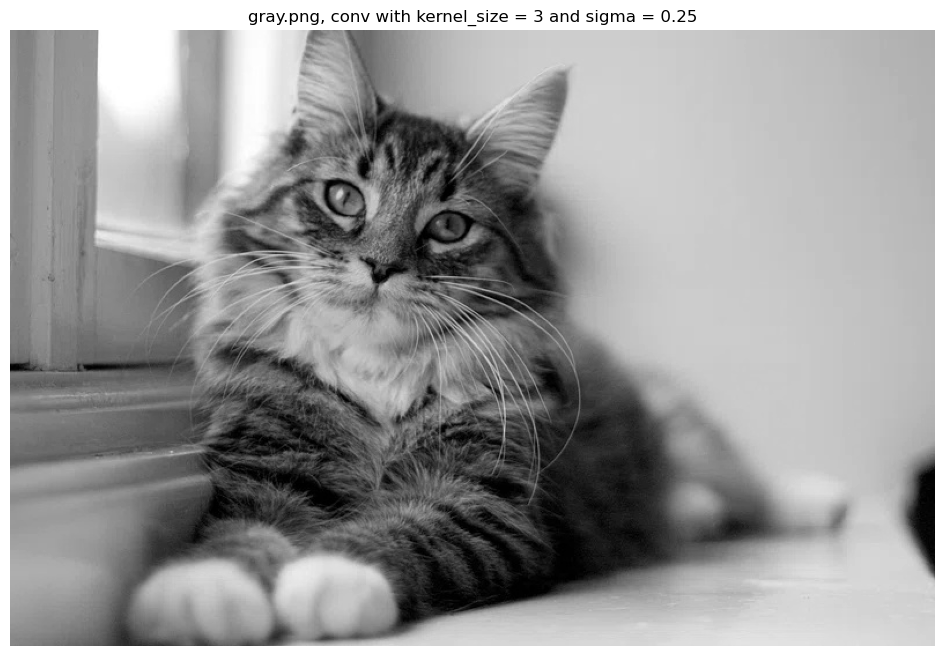

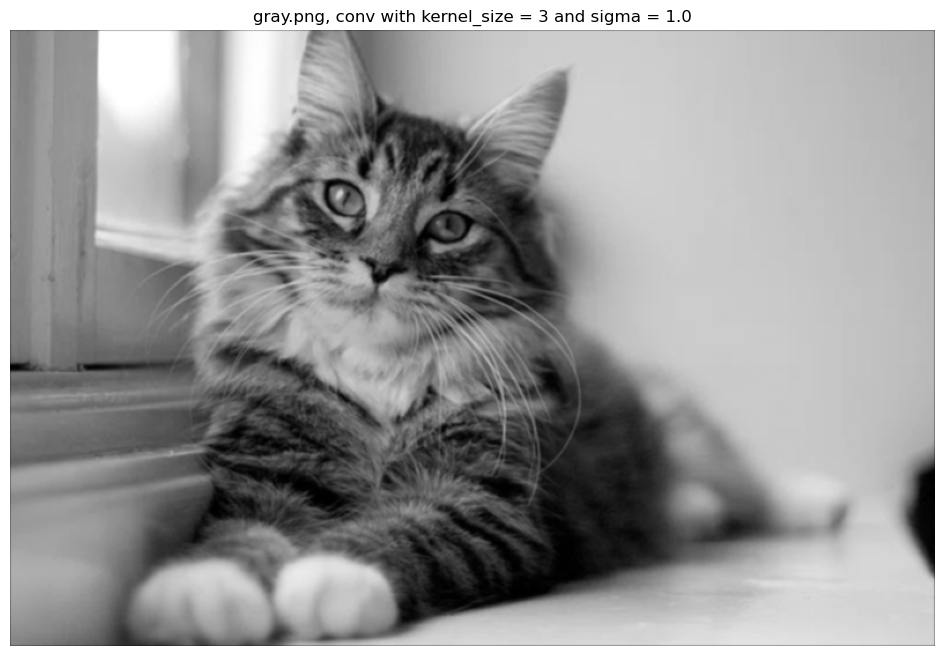

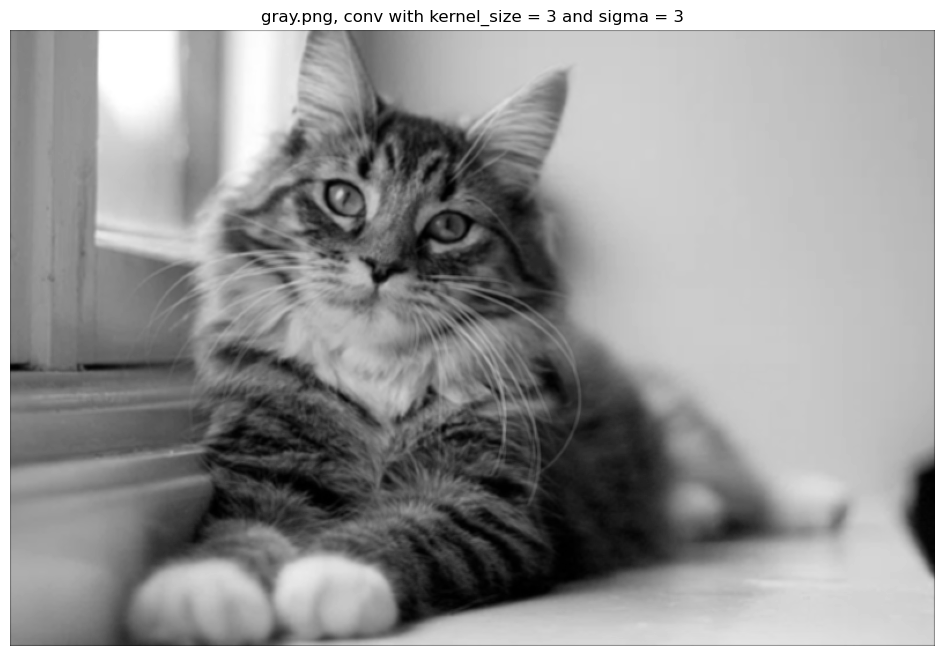

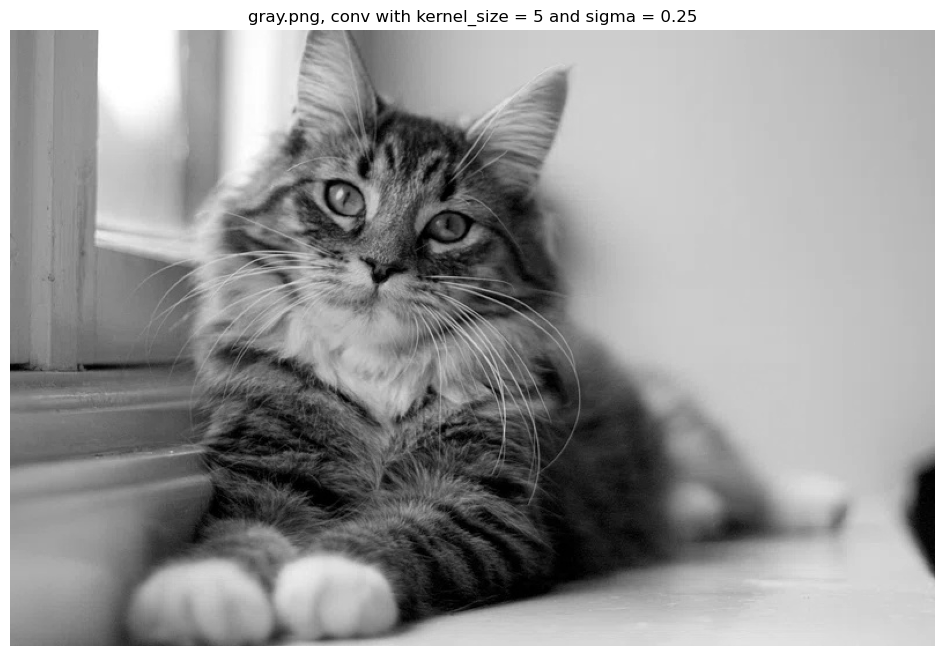

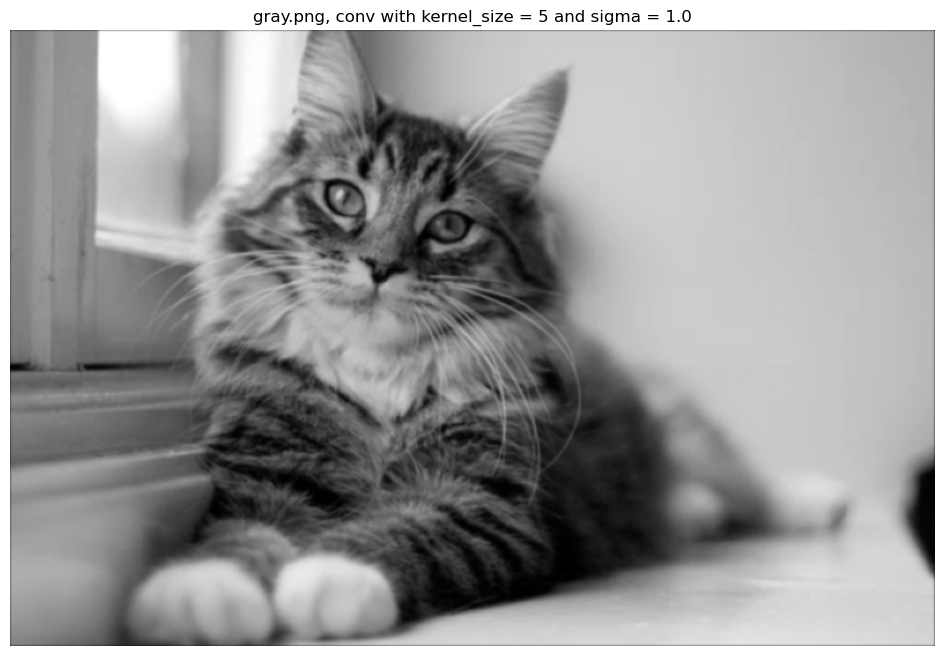

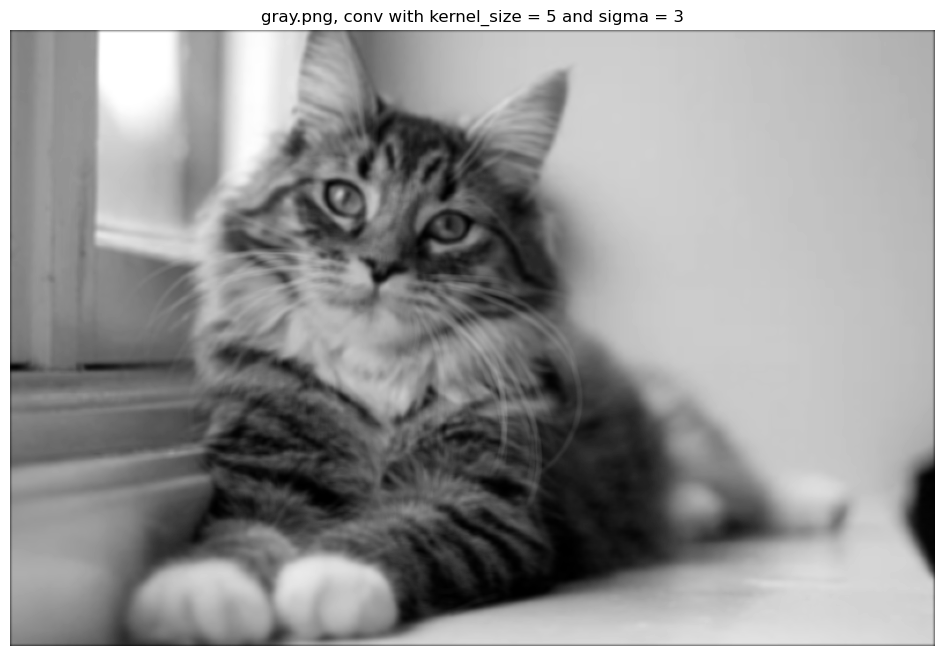

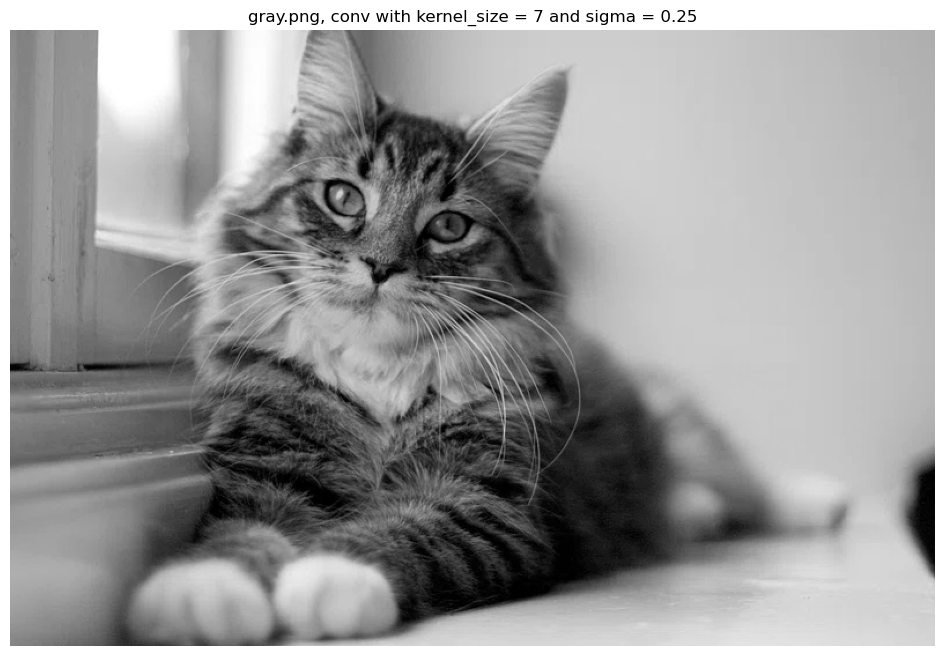

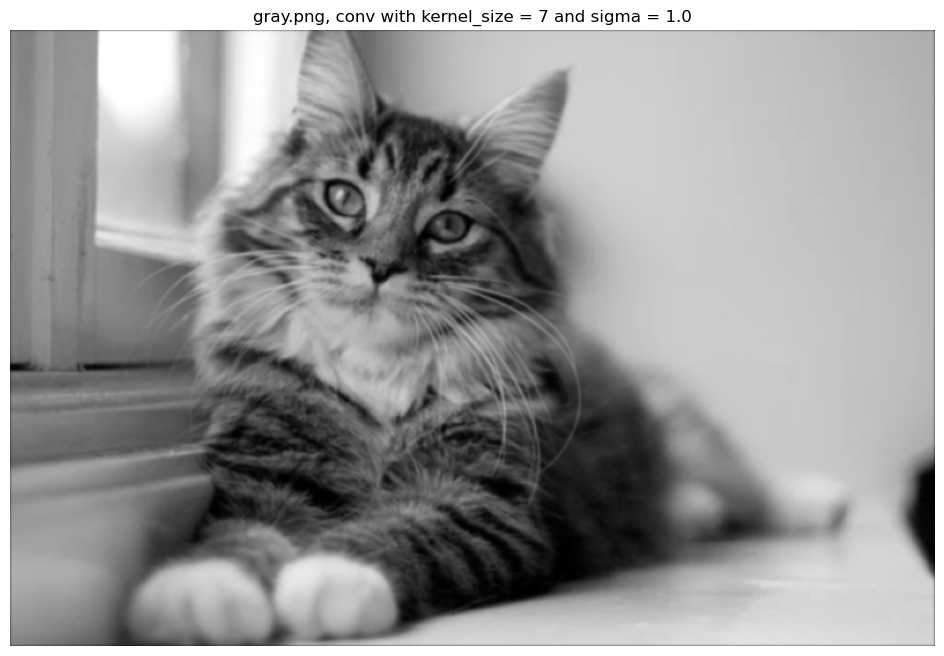

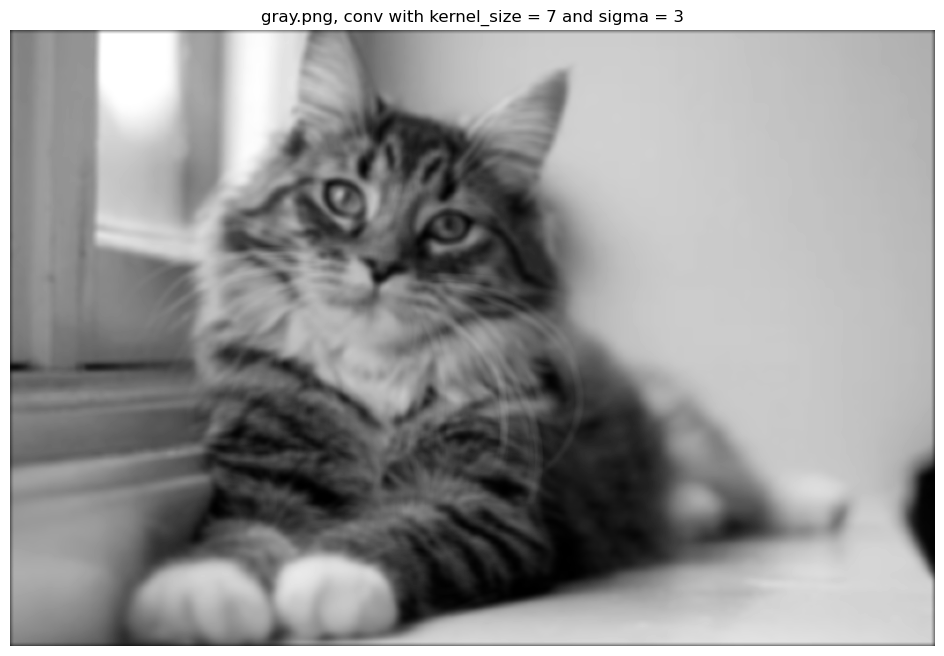

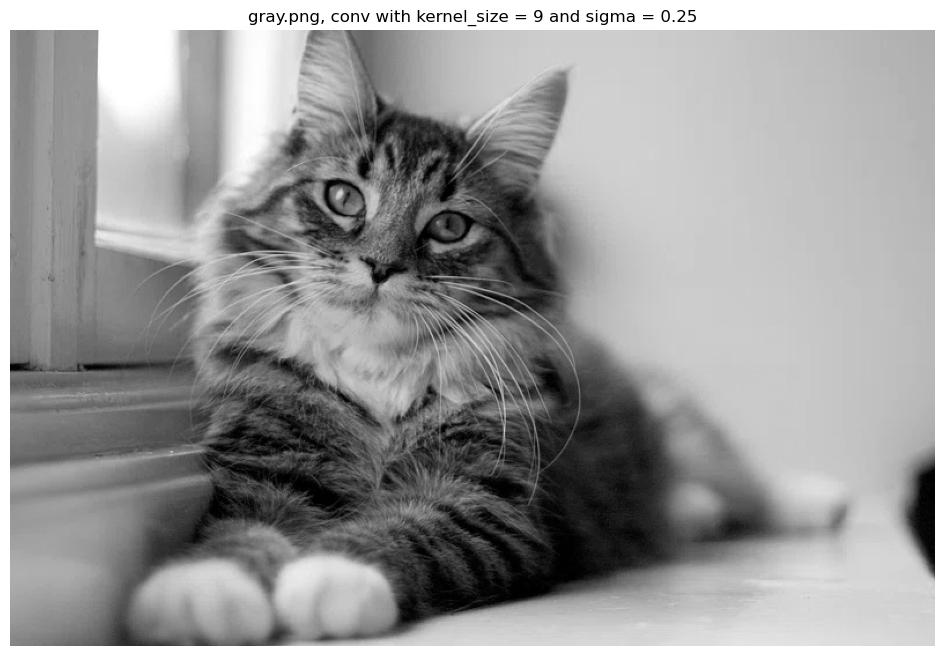

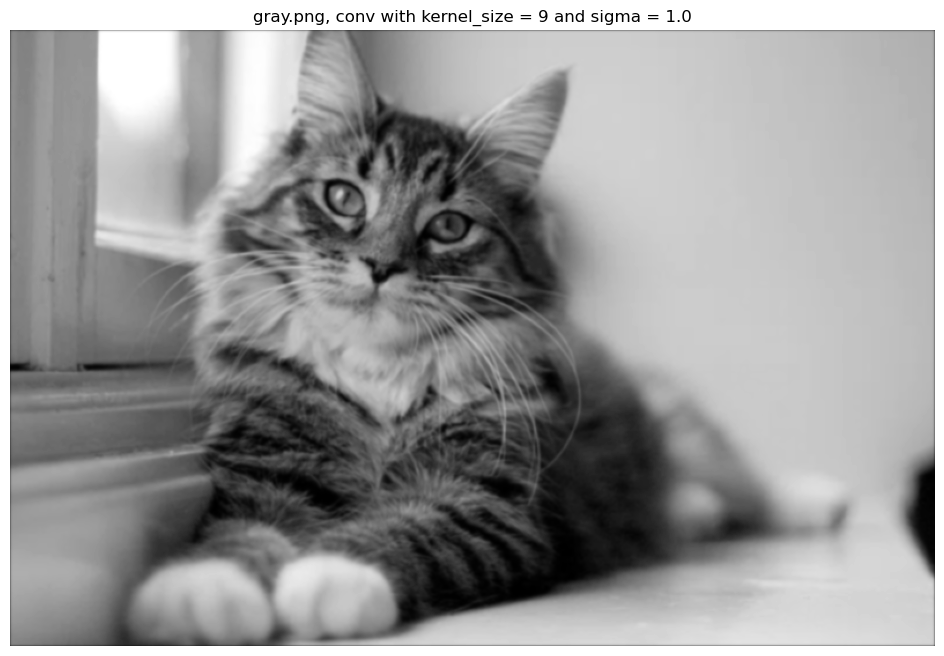

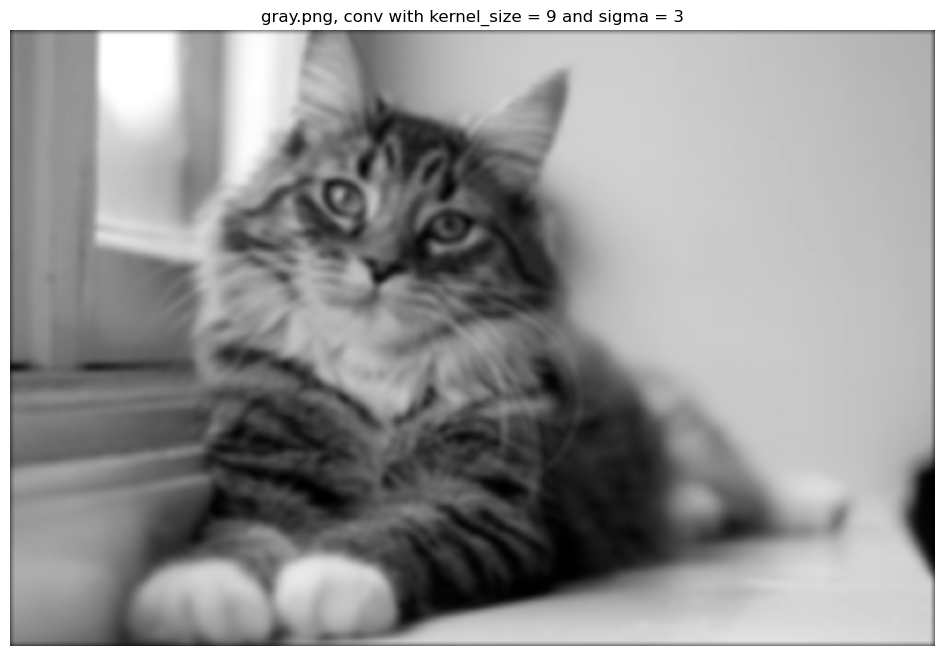

In [13]:
# Your code here
kernel_size_list = [3, 5, 7, 9]
sigma_list = [.25, 1., 3]

for kernel_size, sigma in [(kernel_size, sigma) for kernel_size in kernel_size_list for sigma in sigma_list]:
    plt.imshow(conv_2d(gray, create_gaussian_kernel(kernel_size, sigma)), cmap='gray')
    plt.axis('off')
    plt.title(f"gray.png, conv with kernel_size = {kernel_size} and sigma = {sigma}")
    plt.show()

## Exercise 2.2: Building Gaussian Pyramids


The following `downsample` and `upsample` functions will be useful for writing the build_gaussian_pyramid function:


In [14]:
def downsample(image):
    """Downsample image by factor of 2 using proper averaging

    Args:
        image (numpy.ndarray): Input image to downsample

    Returns:
        numpy.ndarray: Downsampled image at half the input resolution
    """
    return image[::2, ::2]

def upsample(image, original_shape):
    """Upsample image by factor of 2 using linear interpolation

    Args:
        image (numpy.ndarray): Input image
        original_shape (tuple): Shape to upsample to

    Returns:
        numpy.ndarray: Upsampled image
    """
    upsampled = np.zeros((image.shape[0]*2, image.shape[1]*2))
    upsampled[::2, ::2] = image
    # Linear interpolation
    upsampled[1::2, ::2] = upsampled[:-1:2, ::2]
    upsampled[::2, 1::2] = upsampled[::2, :-1:2]
    upsampled[1::2, 1::2] = upsampled[:-1:2, :-1:2]
    return upsampled[:original_shape[0], :original_shape[1]]

Implement the `build_gaussian_pyramid` function.


In [15]:
def build_gaussian_pyramid(image, levels=4, kernel_size=5, sigma=1.0):
    """Build Gaussian pyramid from input image

    Args:
        image (numpy.ndarray): Input image
        levels (int): Number of pyramid levels
        kernel_size (int): Size of Gaussian kernel
        sigma (float): Standard deviation of Gaussian

    Returns:
        list: Gaussian pyramid levels
    """
    pyramid = [image]
    for _ in range(1, levels):
        blurred_image = conv_2d(pyramid[-1], create_gaussian_kernel(kernel_size, sigma)) #Blur last image
        blurred_image = downsample(blurred_image) # Downsample by a factor of 2
        pyramid.append(blurred_image)

    return pyramid

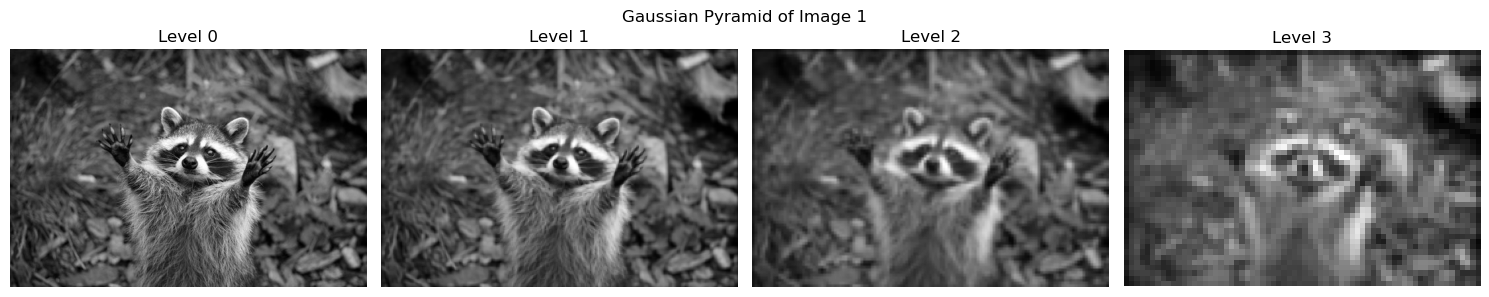

In [16]:
# Load a test image
image1 = cv2.imread(FILEPATH + 'racoon.jpg', cv2.IMREAD_GRAYSCALE)

# Build and visualize Gaussian pyramid for first image
gauss_pyramid = build_gaussian_pyramid(image1)

# Visualize Gaussian pyramid
plt.figure(figsize=(15, 3))
for i, level in enumerate(gauss_pyramid):
    plt.subplot(1, len(gauss_pyramid), i+1)
    plt.imshow(level, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')
plt.suptitle('Gaussian Pyramid of Image 1')
plt.tight_layout()
plt.show()

## Exercise 2.3: Laplacian Pyramid

Implement functions for:

1. Building the Laplacian pyramid
2. Reconstructing the original image from the Laplacian pyramid

Questions to consider:

- How does the Laplacian pyramid represent image details?
- What information is captured at each level?

Note:
There is a small error in the lecture notes - you do not blur after upsampling!


In [17]:
def build_laplacian_pyramid(gaussian_pyramid):
    """Build Laplacian pyramid from Gaussian pyramid

    Args:
        gaussian_pyramid (list): Gaussian pyramid levels

    Returns:
        list: Laplacian pyramid levels
    """
    pyramid=[]
    for i in range(len(gaussian_pyramid)-1):
        G_i, G_i1 = gaussian_pyramid[i], gaussian_pyramid[i+1]
        G_i1 = upsample(G_i1, G_i.shape) # Upsample image
        laplacian = G_i - G_i1
        pyramid.append(laplacian)

    return pyramid

def reconstruct_from_laplacian(laplacian_pyramid):
    """Reconstruct image from Laplacian pyramid

    Args:
        laplacian_pyramid (list): Laplacian pyramid levels

    Returns:
        numpy.ndarray: Reconstructed image
    """
    reconstructed_image = laplacian_pyramid[-1]

    for i in range(len(laplacian_pyramid)-2, -1, -1): #Reverse through the pyramid levels
        upsampled = upsample(reconstructed_image, laplacian_pyramid[i].shape)
        reconstructed_image = upsampled + laplacian_pyramid[i]

    return reconstructed_image

Plot the pixel-wise error of the reconstruction using the Laplacian pyramid


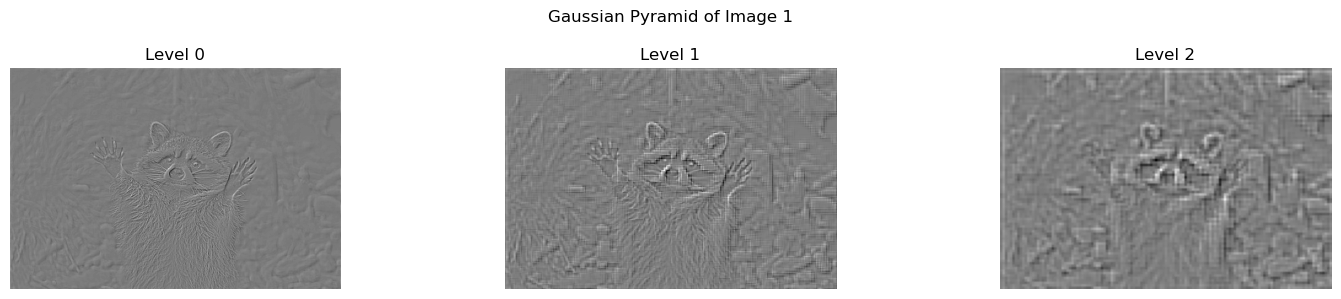

In [18]:
# Load a test image
image1 = cv2.imread(FILEPATH + 'racoon.jpg', cv2.IMREAD_GRAYSCALE)

# Build and visualize Gaussian pyramid for first image
gauss_pyramid = build_gaussian_pyramid(image1)
laplacian_pyramid = build_laplacian_pyramid(gauss_pyramid)

# Visualize Laplacian pyramid
plt.figure(figsize=(15, 3))
for i, level in enumerate(laplacian_pyramid):
    plt.subplot(1, len(laplacian_pyramid), i+1)
    plt.imshow(level, cmap='gray')
    plt.title(f'Level {i}')
    plt.axis('off')
plt.suptitle('Gaussian Pyramid of Image 1')
plt.tight_layout()
plt.show()

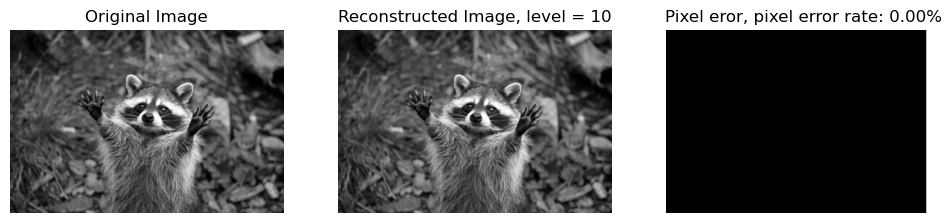

In [19]:
level=10 # Define the level of details captured by the laplacian pyramid. In the case of racoon.jpg, a level of 9 or more perfectly capture the details of the image

_, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(image1, cmap='gray')
ax1.axis('off')
ax1.set_title("Original Image")

gauss_pyramid = build_gaussian_pyramid(image1, level)
laplacian_pyramid = build_laplacian_pyramid(gauss_pyramid)
reconstructed_image = reconstruct_from_laplacian(laplacian_pyramid)

ax2.imshow(reconstructed_image, cmap='gray')
ax2.axis('off')
ax2.set_title(f"Reconstructed Image, level = {level}")


ax3.imshow(image1 - reconstructed_image, cmap='gray')
ax3.axis('off')
ax3.set_title(f"Pixel eror, pixel error rate: {np.sum(abs(image1 - reconstructed_image) >= 25.5) / image1.size:.2%}") # We'll consider that a pixel is not properly estimated when the difference between the original image and the reconstructed image is more than 10% of a maximum value (255)

plt.show()

## Exercise 2.4: Multi-Scale Image Blending

Implement the pyramid blending algorithm:

1. Build Laplacian pyramids for both images
2. Build Gaussian pyramid for the mask
3. Blend pyramids at each scale
4. Reconstruct final result


In [20]:
def pyramid_blend(image1, image2, mask, levels=4):
    """Blend two images using pyramid blending

    Args:
        image1, image2 (numpy.ndarray): Images to blend
        mask (numpy.ndarray): Blending mask
        levels (int): Number of pyramid levels

    Returns:
        numpy.ndarray: Blended image
    """
    G_M = build_gaussian_pyramid(mask, levels) # Construct gaussian pyramid for the mask
    LI1, LI2 = build_laplacian_pyramid(build_gaussian_pyramid(image1, levels)), build_laplacian_pyramid(build_gaussian_pyramid(image2, levels)) # Construct both laplacian pyramid

    B = []
    for k in range(levels-1):
        Bk = LI1[k] * G_M[k] + LI2[k] * (255 * np.ones_like(G_M[k]) - G_M[k])
        B.append(Bk)

    return reconstruct_from_laplacian(B)

Demonstrate the pyramid blend on the grayscale images `racoon.jpg` and `crowd.jpg` using the mask provided in `blend_mask.jpg`


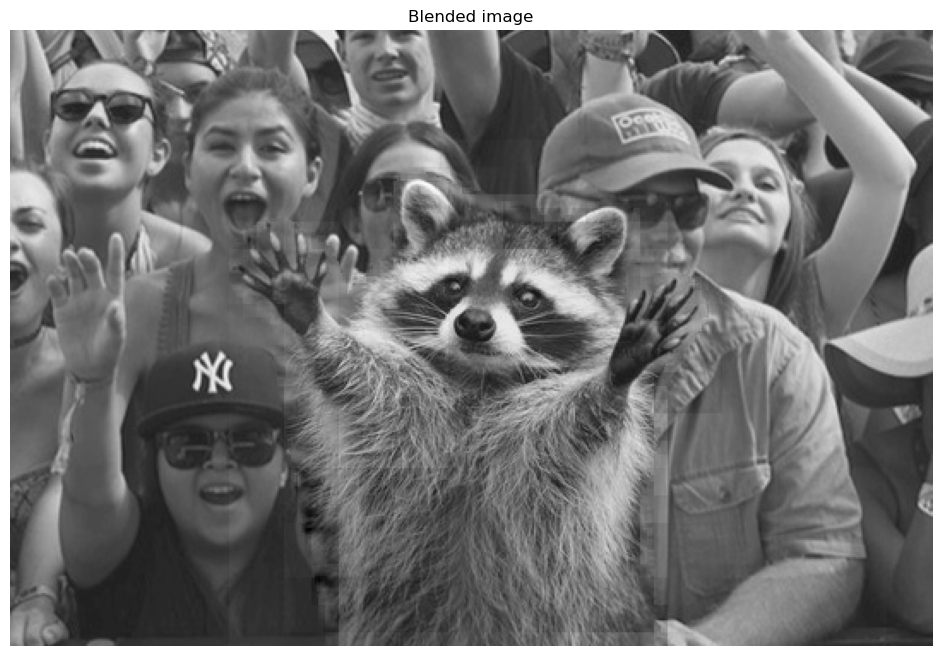

In [21]:
racoon = cv2.imread(FILEPATH + 'racoon.jpg', cv2.IMREAD_GRAYSCALE)
crowd = cv2.imread(FILEPATH + 'crowd.jpg', cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(FILEPATH + 'blend_mask.png', cv2.IMREAD_GRAYSCALE)

blended_image = pyramid_blend(racoon, crowd, mask, levels=10)

plt.imshow(blended_image, cmap='gray')
plt.axis('off')
plt.title("Blended image") # Increasing the number of level greatly increase the quality of the blended image
plt.show()

How does the number of levels in the pyramid affect the blending?


# Part 3: Edge Detection

## Exercise 3.1: Gradient Computation

Implement gradient computation using Sobel operators:

1. Define Sobel kernels
2. Compute x and y gradients
3. Calculate magnitude and direction


In [22]:
def compute_gradients(image):
    """Compute gradients using Sobel operators

    Args:
        image (numpy.ndarray): Input image

    Returns:
        tuple: (gradient magnitude, gradient direction in radians)
    """

    Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    Sobel_y = np.array([[-1, -2, 1], [0, 0, 0], [1, 2, 1]])

    # Compute gradients
    Gradient_x = conv_2d(image, Sobel_x)
    Gradient_y = conv_2d(image, Sobel_y)

    return np.sqrt(Gradient_x **2 + Gradient_y **2), np.arctan2(Gradient_y, Gradient_x)

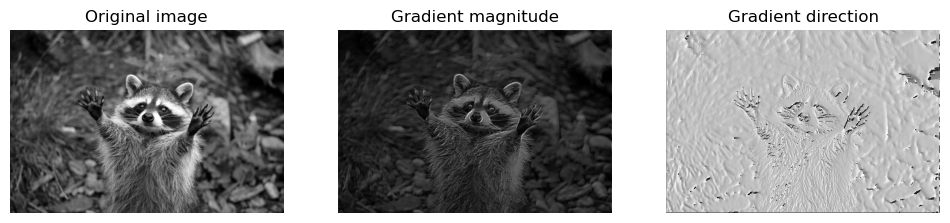

In [23]:
image1 = cv2.imread(FILEPATH + "racoon.jpg", cv2.IMREAD_GRAYSCALE)
magnitude, direction = compute_gradients(image1)

_, (ax1, ax2, ax3) = plt.subplots(1 ,3)

ax1.imshow(image1, cmap='gray')
ax1.axis('off')
ax1.set_title("Original image")

ax2.imshow(magnitude, cmap='gray')
ax2.axis('off')
ax2.set_title("Gradient magnitude")

ax3.imshow(direction, cmap='gray')
ax3.axis('off')
ax3.set_title("Gradient direction")

plt.show()

## Exercise 3.2: Non-Maximum Suppression

Implement non-maximum suppression:

1. Convert gradient direction to angles
2. Compare magnitude with neighbors along gradient direction
3. Suppress non-maximum pixels


In [24]:
def non_maximum_suppression(magnitude, direction):
    """Apply non-maximum suppression to gradient magnitude

    Args:
        magnitude (numpy.ndarray): Gradient magnitude
        direction (numpy.ndarray): Gradient direction in radians

    Returns:
        numpy.ndarray: Suppressed gradient magnitude
    """
    # Your code here
    pass

## Exercise 3.3: Double Thresholding and Edge Tracking

Implement:

1. Double thresholding to identify strong/weak edges
2. Edge tracking by hysteresis


In [25]:
def double_threshold(image, low_ratio=0.05, high_ratio=0.15):
    """Apply double thresholding to classify edges

    Args:
        image (numpy.ndarray): Input image
        low_ratio (float): Low threshold ratio
        high_ratio (float): High threshold ratio

    Returns:
        tuple: (strong edges, weak edges)
    """
    # Your code here
    pass

def edge_tracking(strong_edges, weak_edges):
    """Track edges using hysteresis.

    Args:
        strong_edges (numpy.ndarray): Binary image of strong edges
        weak_edges (numpy.ndarray): Binary image of weak edges

    Returns:
        numpy.ndarray: Final binary edge image
    """
    # Your code here
    pass

## Exercise 3.4: Complete Canny Edge Detector

Combine all components into a complete Canny edge detector:

1. Gaussian smoothing
2. Gradient computation
3. Non-maximum suppression
4. Double thresholding
5. Edge tracking


In [26]:
def canny_edge_detector(image, kernel_size=5, sigma=1.0,
                       low_ratio=0.05, high_ratio=0.15):
    """Complete Canny edge detection implementation

    Args:
        image (numpy.ndarray): Input image
        kernel_size (int): Size of Gaussian kernel
        sigma (float): Standard deviation of Gaussian
        low_ratio (float): Low threshold ratio
        high_ratio (float): High threshold ratio

    Returns:
        dict: Dictionary containing final edges and intermediate results
    """
    # Your code here
    # Return all intermediate results for visualization
    return {
        'smoothed': smoothed,
        'magnitude': magnitude,
        'direction': direction,
        'suppressed': suppressed,
        'strong_edges': strong_edges,
        'weak_edges': weak_edges,
        'final_edges': final_edges
    }

Questions to consider:

1. How does changing sigma in the Gaussian smoothing affect the detected edges?

- How does it impact noise sensitivity?
- What happens to fine details as sigma increases?

2. Why do we need both gradient magnitude and direction?

- What information does each component provide?
- How do they work together in edge detection?

3. Analyze the role of non-maximum suppression:

- What problem does it solve?
- How would edges look without it?
